In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols    
from statsmodels.stats.anova import _get_covariance,anova_lm 
from statsmodels import multivariate
import statsmodels.api as sm
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo
from matplotlib.patches import Rectangle

## Problem 2A:
**The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.**

Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?
Is scaling necessary for PCA in this case? Give justification and perform scaling.
Comment on the comparison between the covariance and the correlation matrices from this data.
Check the dataset for outliers before and after scaling. What insight do you derive here? [Please do not treat Outliers unless specifically asked to do so]
Perform PCA and export the data of the Principal Component scores into a data frame.
Extract the eigenvalues and eigenvectors.[print both]
Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only).
Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?
Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

In [2]:
df = pd.read_csv('Education+-+Post+12th+Standard.csv')
df.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
df.shape

(777, 18)

In [4]:
df.dtypes

Names           object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [5]:
df.isna().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


In [8]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


In [9]:
df[df.PhD >100]

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
582,Texas A&M University at Galveston,529,481,243,22,47,1206,134,4860,3122,600,650,103,88,17.4,16,6415,43


In [10]:
df[df['Grad.Rate'] >100]

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [11]:
df.PhD.replace(to_replace=103, value=df.PhD.median(),inplace=True)
df['Grad.Rate'].replace(to_replace=118, value=df['Grad.Rate'].median(),inplace=True)

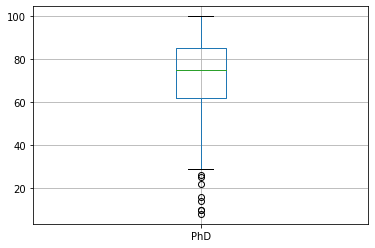

In [12]:
df.boxplot(column=['PhD'])
plt.show()

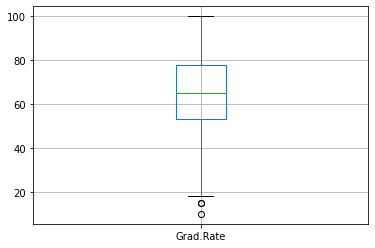

In [13]:
df.boxplot(column=['Grad.Rate'])
plt.show()

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


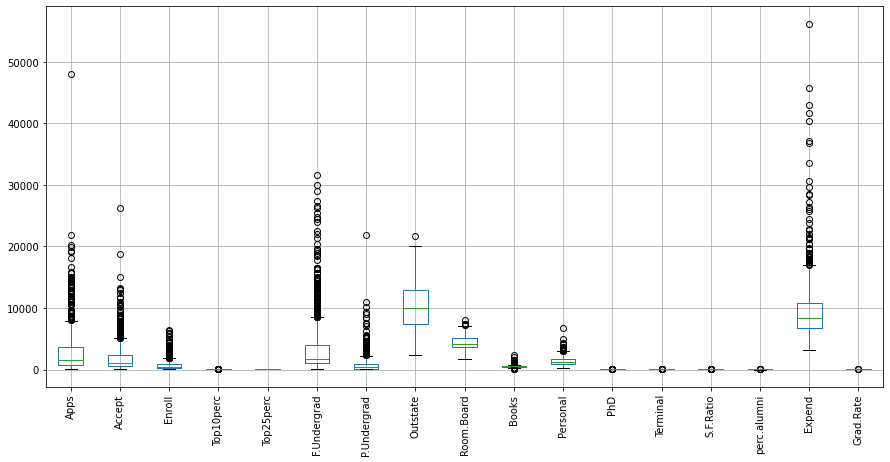

In [15]:
df.boxplot(figsize=(15,7))
plt.xticks(rotation=90)
plt.show()

## 2.1 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?


**Univariate Analysis**

In [16]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

In [17]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

17

Description of Apps
----------------------------------------------------------------------------
count      777.000000
mean      3001.638353
std       3870.201484
min         81.000000
25%        776.000000
50%       1558.000000
75%       3624.000000
max      48094.000000
Name: Apps, dtype: float64 Distribution of Apps
----------------------------------------------------------------------------


C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


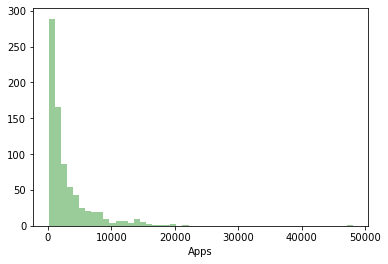

BoxPlot of Apps
----------------------------------------------------------------------------


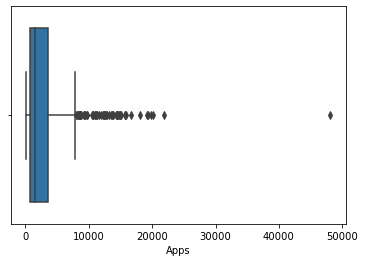

Description of Accept
----------------------------------------------------------------------------
count      777.000000
mean      2018.804376
std       2451.113971
min         72.000000
25%        604.000000
50%       1110.000000
75%       2424.000000
max      26330.000000
Name: Accept, dtype: float64 Distribution of Accept
----------------------------------------------------------------------------


C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


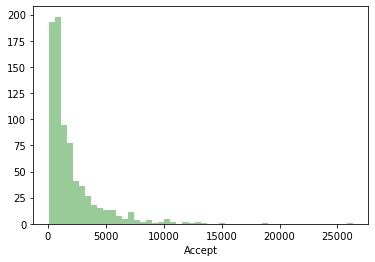

BoxPlot of Accept
----------------------------------------------------------------------------


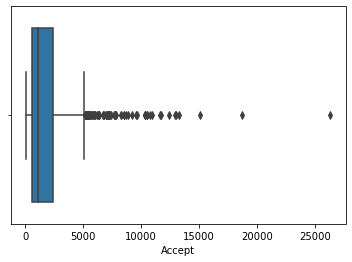

Description of Enroll
----------------------------------------------------------------------------
count     777.000000
mean      779.972973
std       929.176190
min        35.000000
25%       242.000000
50%       434.000000
75%       902.000000
max      6392.000000
Name: Enroll, dtype: float64 Distribution of Enroll
----------------------------------------------------------------------------


C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


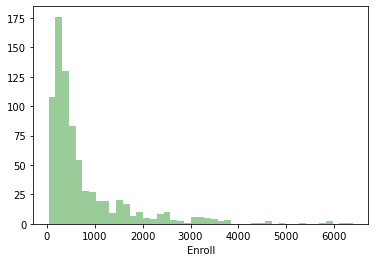

BoxPlot of Enroll
----------------------------------------------------------------------------


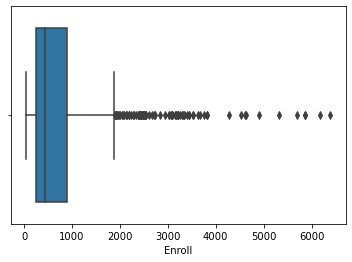

Description of Top10perc
----------------------------------------------------------------------------
count    777.000000
mean      27.558559
std       17.640364
min        1.000000
25%       15.000000
50%       23.000000
75%       35.000000
max       96.000000
Name: Top10perc, dtype: float64 Distribution of Top10perc
----------------------------------------------------------------------------


C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


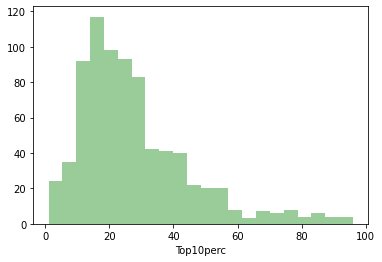

BoxPlot of Top10perc
----------------------------------------------------------------------------


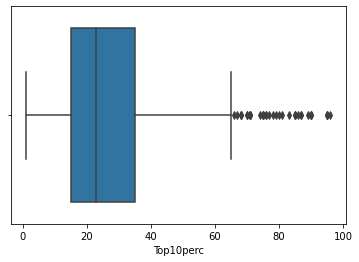

Description of Top25perc
----------------------------------------------------------------------------
count    777.000000
mean      55.796654
std       19.804778
min        9.000000
25%       41.000000
50%       54.000000
75%       69.000000
max      100.000000
Name: Top25perc, dtype: float64 Distribution of Top25perc
----------------------------------------------------------------------------


C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


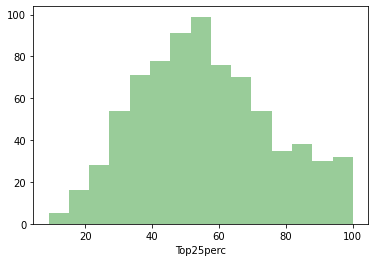

BoxPlot of Top25perc
----------------------------------------------------------------------------


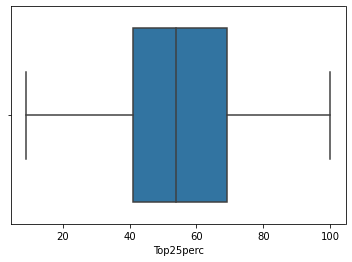

Description of F.Undergrad
----------------------------------------------------------------------------
count      777.000000
mean      3699.907336
std       4850.420531
min        139.000000
25%        992.000000
50%       1707.000000
75%       4005.000000
max      31643.000000
Name: F.Undergrad, dtype: float64 Distribution of F.Undergrad
----------------------------------------------------------------------------


C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


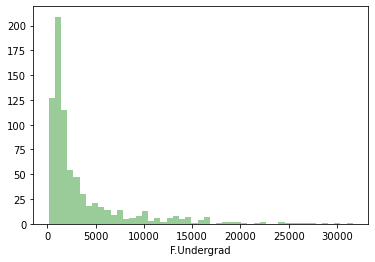

BoxPlot of F.Undergrad
----------------------------------------------------------------------------


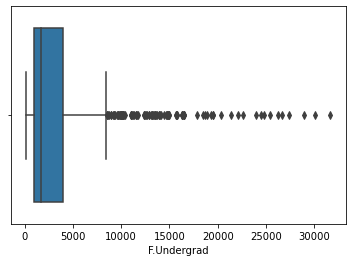

Description of P.Undergrad
----------------------------------------------------------------------------
count      777.000000
mean       855.298584
std       1522.431887
min          1.000000
25%         95.000000
50%        353.000000
75%        967.000000
max      21836.000000
Name: P.Undergrad, dtype: float64 Distribution of P.Undergrad
----------------------------------------------------------------------------


C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


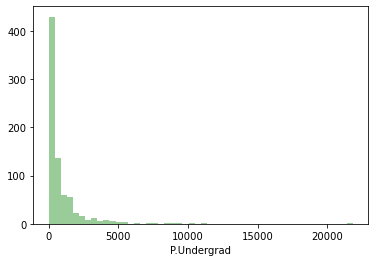

BoxPlot of P.Undergrad
----------------------------------------------------------------------------


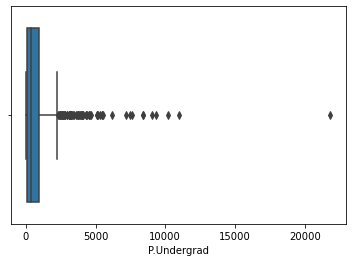

Description of Outstate
----------------------------------------------------------------------------
count      777.000000
mean     10440.669241
std       4023.016484
min       2340.000000
25%       7320.000000
50%       9990.000000
75%      12925.000000
max      21700.000000
Name: Outstate, dtype: float64 Distribution of Outstate
----------------------------------------------------------------------------


C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


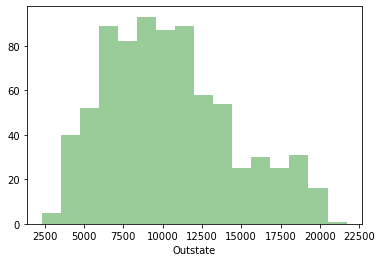

BoxPlot of Outstate
----------------------------------------------------------------------------


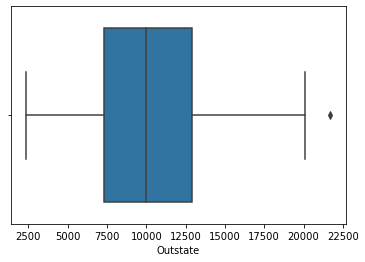

Description of Room.Board
----------------------------------------------------------------------------
count     777.000000
mean     4357.526384
std      1096.696416
min      1780.000000
25%      3597.000000
50%      4200.000000
75%      5050.000000
max      8124.000000
Name: Room.Board, dtype: float64 Distribution of Room.Board
----------------------------------------------------------------------------


C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


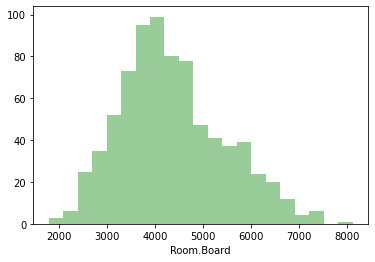

BoxPlot of Room.Board
----------------------------------------------------------------------------


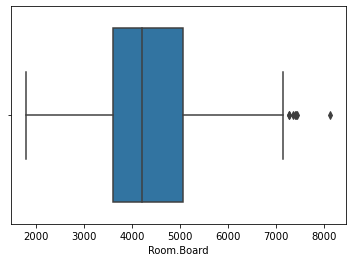

Description of Books
----------------------------------------------------------------------------
count     777.000000
mean      549.380952
std       165.105360
min        96.000000
25%       470.000000
50%       500.000000
75%       600.000000
max      2340.000000
Name: Books, dtype: float64 Distribution of Books
----------------------------------------------------------------------------


C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


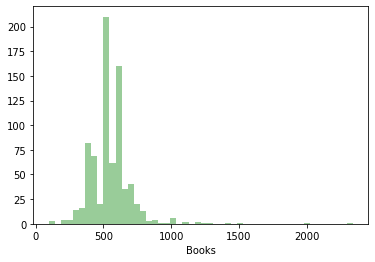

BoxPlot of Books
----------------------------------------------------------------------------


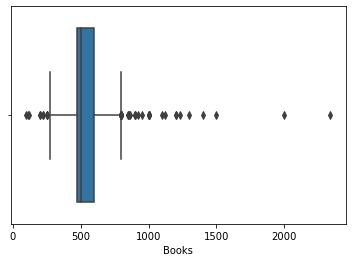

Description of Personal
----------------------------------------------------------------------------
count     777.000000
mean     1340.642214
std       677.071454
min       250.000000
25%       850.000000
50%      1200.000000
75%      1700.000000
max      6800.000000
Name: Personal, dtype: float64 Distribution of Personal
----------------------------------------------------------------------------


C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


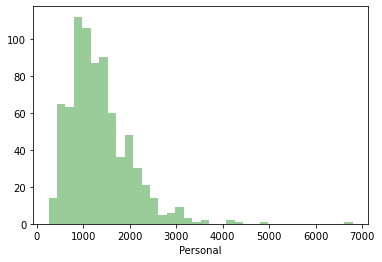

BoxPlot of Personal
----------------------------------------------------------------------------


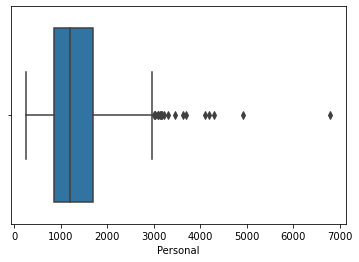

Description of PhD
----------------------------------------------------------------------------
count    777.000000
mean      72.624196
std       16.291967
min        8.000000
25%       62.000000
50%       75.000000
75%       85.000000
max      100.000000
Name: PhD, dtype: float64 Distribution of PhD
----------------------------------------------------------------------------


C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


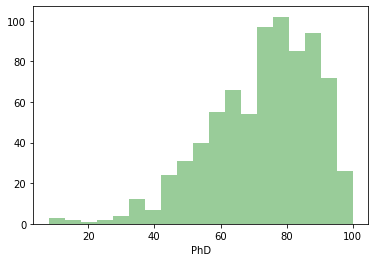

BoxPlot of PhD
----------------------------------------------------------------------------


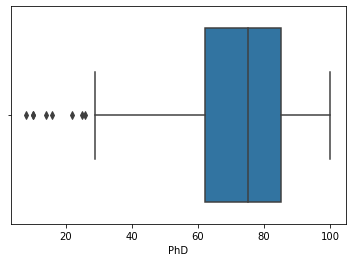

Description of Terminal
----------------------------------------------------------------------------
count    777.000000
mean      79.702703
std       14.722359
min       24.000000
25%       71.000000
50%       82.000000
75%       92.000000
max      100.000000
Name: Terminal, dtype: float64 Distribution of Terminal
----------------------------------------------------------------------------


C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


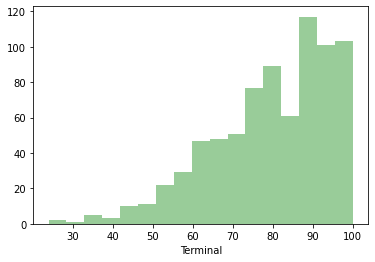

BoxPlot of Terminal
----------------------------------------------------------------------------


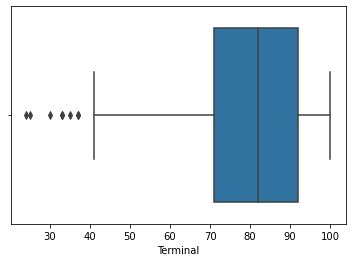

Description of S.F.Ratio
----------------------------------------------------------------------------
count    777.000000
mean      14.089704
std        3.958349
min        2.500000
25%       11.500000
50%       13.600000
75%       16.500000
max       39.800000
Name: S.F.Ratio, dtype: float64 Distribution of S.F.Ratio
----------------------------------------------------------------------------


C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


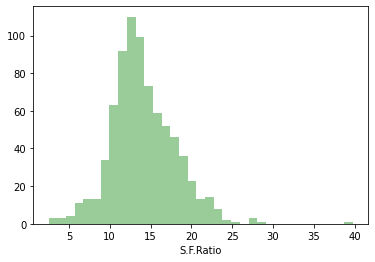

BoxPlot of S.F.Ratio
----------------------------------------------------------------------------


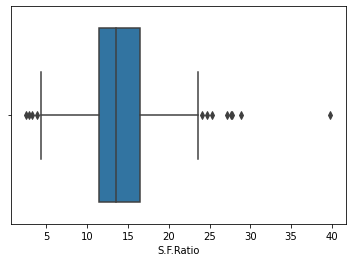

Description of perc.alumni
----------------------------------------------------------------------------
count    777.000000
mean      22.743887
std       12.391801
min        0.000000
25%       13.000000
50%       21.000000
75%       31.000000
max       64.000000
Name: perc.alumni, dtype: float64 Distribution of perc.alumni
----------------------------------------------------------------------------


C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


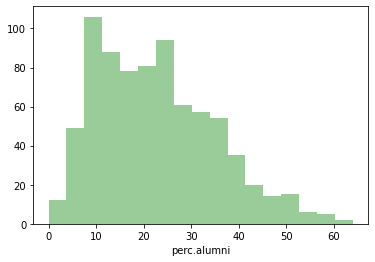

BoxPlot of perc.alumni
----------------------------------------------------------------------------


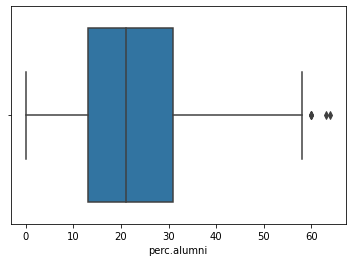

Description of Expend
----------------------------------------------------------------------------
count      777.000000
mean      9660.171171
std       5221.768440
min       3186.000000
25%       6751.000000
50%       8377.000000
75%      10830.000000
max      56233.000000
Name: Expend, dtype: float64 Distribution of Expend
----------------------------------------------------------------------------


C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


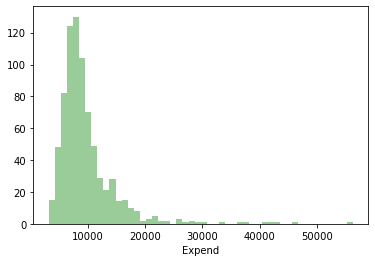

BoxPlot of Expend
----------------------------------------------------------------------------


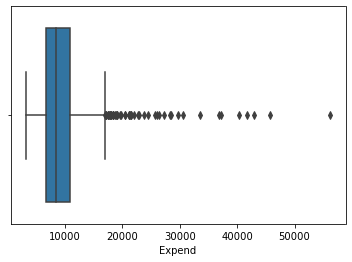

Description of Grad.Rate
----------------------------------------------------------------------------
count    777.000000
mean      65.395109
std       17.073737
min       10.000000
25%       53.000000
50%       65.000000
75%       78.000000
max      100.000000
Name: Grad.Rate, dtype: float64 Distribution of Grad.Rate
----------------------------------------------------------------------------


C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


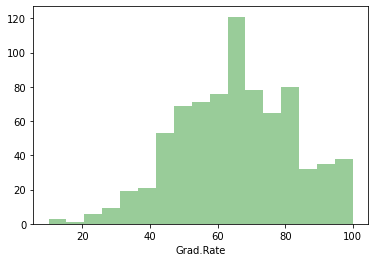

BoxPlot of Grad.Rate
----------------------------------------------------------------------------


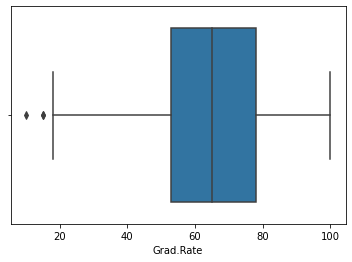

In [18]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

**Observations of Univariate Analysis**

Avg of 3001 application were received whereas Avg applications accepted stands at 2019 with the highest being 26330.

Avg of F.Undergrad were 3700 whereas Avg P.Undergrad were 855 and Avg Outstate was highest at 10440.

Mean and Median for Room Board per student are almost similar reflecting similar charges being imposed by almost 50% of the universities whereas Mean and Median for Book Costs per student is similar for 75% of the universities.

Personal expenses for most of the students ranges from 250 to 3000.

A minimum of 8% faculty members have a PhD qualification and min 24% have terminal degrees across all universities. 

The Avg student/Faculty ratio is 14 which is similar to the student/faculty ratio for 50% of the universities.

9660 is the Avg instructional expenditure per student which is very close to 10830 which is the instruction expenditure per student for 75% of the universities.

Maximum data across most continuous variables lies above IQR 3 with exceptions of Phd & Terminal.

All variables have outliers except for Top25perc (Percentage of new students from top 25% of Higher Secondary class). However, we are not trating the outliers in this case. 

Both Right and Left Skewness is present in the variables as well as a few are normally distributed. 



**Multivariate Analysis**

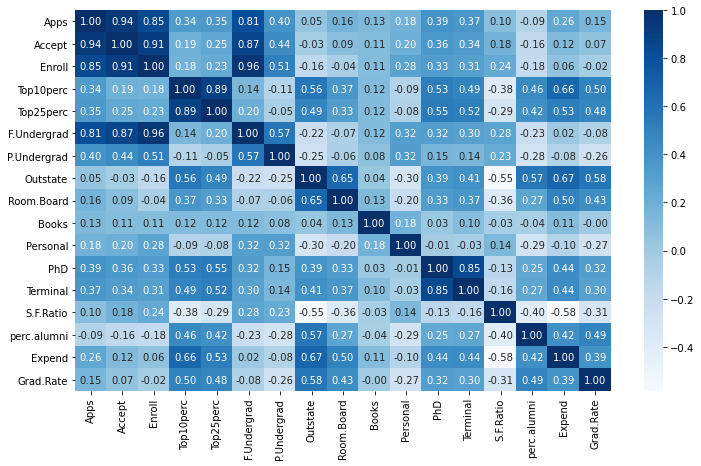

In [19]:
plt.figure(figsize=(12,7))
sns.heatmap(df_num.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

**Observations of Multivariate Analysis**

There are both positive and negative correlations in the data. 

'Apps', 'Accept', 'Enroll' & "F.Undergrad" are highly correlated with each other.

'P.Undergrad', 'Books', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni','Expend', 'Grad.rate' does not have much higher or lower correlation with most fields in the data.

'Top10perc' has high correlation with 'Top25perc'.

'Outstate' has positive correlation with 'Room.Board' and 'Expend".

'S.F.Ratio' has the lowest correlation with 'perc.alumni'.

'PhD' and "Terminal" have high correlation.

There is interdependency observed between some of the variables observed which gives room for PCA.

## 2.2 Is scaling necessary for PCA in this case? Give justification and perform scaling.

**Yes, scaling is necessary for PCA in this case. We need to scale data as the scale of measurements used across the provided variables is not standard and varies according to set of variables. While, the scale of measurements are provided in level of percentage terms for some variables such as 'Top10perc', 'Top25perc', 'PhD', 'Terminal' and 'perc.alumni' for some it is denoted in amount spend for certain items such as 'Room.Board', 'Books', 'Personal' and 'Expend' or in ratios such as 'S.F.Ratio' and 'Grad.Rate'and for rest of the variables it is in plain figures such as 'Apps', 'Accept', 'Enroll', 'F.Undergrad', 'P.Undergrad'and 'Outstate'. As in this case, we choose not to remove any variable componenets from the given dataset to perform the PCA, it is essential that we scale the data**

In [23]:
df_num_scaled = df_num.apply(zscore)
df_num_scaled.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.161177,-0.115729,1.013776,-0.867574,-0.501910,-0.316192
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.679375,-3.378176,-0.477704,-0.544572,0.166110,-0.550621
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.205308,-0.931341,-0.300749,0.585935,-0.177290,-0.667836
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.190052,1.175657,-1.615274,1.151188,1.792851,-0.374800
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.207340,-0.523535,-0.553542,-1.675079,0.241803,-2.953517


## 2.3 Comment on the comparison between the covariance and the correlation matrices from this data.

In [24]:
corr_scaled = df_num_scaled.corr(method='pearson')
corr_scaled

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.392980,0.369491,0.095633,-0.090226,0.259592,0.146775
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.357938,0.337583,0.176229,-0.159990,0.124717,0.065414
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.333485,0.308274,0.237271,-0.180794,0.064169,-0.021388
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.533707,0.491135,-0.384875,0.455485,0.660913,0.502212
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.548058,0.524749,-0.294629,0.417864,0.527447,0.484388
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.320183,0.300019,0.279703,-0.229462,0.018652,-0.077034
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.150495,0.141904,0.232531,-0.280792,-0.083568,-0.256350
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.386905,0.407983,-0.554821,0.566262,0.672779,0.575820
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.332429,0.374540,-0.362628,0.272363,0.501739,0.425769
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026286,0.099955,-0.031929,-0.040208,0.112409,-0.000159


In [25]:
cov_matrix = np.cov(df_num_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866e+00  9.44666359e-01  8.47913316e-01  3.39270321e-01
   3.52093041e-01  8.15540181e-01  3.98777500e-01  5.02236717e-02
   1.65151509e-01  1.32729421e-01  1.78961168e-01  3.93486554e-01
   3.69967622e-01  9.57562670e-02 -9.03421565e-02  2.59926503e-01
   1.46963658e-01]
 [ 9.44666359e-01  1.00128866e+00  9.12811453e-01  1.92694926e-01
   2.47794654e-01  8.75349854e-01  4.41839380e-01 -2.57877355e-02
   9.10157685e-02  1.13671647e-01  2.01247673e-01  3.58398858e-01
   3.38018401e-01  1.76456113e-01 -1.60196038e-01  1.24877730e-01
   6.54987779e-02]
 [ 8.47913316e-01  9.12811453e-01  1.00128866e+00  1.81527154e-01
   2.27037304e-01  9.65882744e-01  5.13729774e-01 -1.55677702e-01
  -4.02835287e-02  1.12856137e-01  2.81291483e-01  3.33915060e-01
   3.08671332e-01  2.37577072e-01 -1.81027112e-01  6.42519204e-02
  -2.14155645e-02]
 [ 3.39270321e-01  1.92694926e-01  1.81527154e-01  1.00128866e+00
   8.93144451e-01  1.41470801e-01 -1.05492050e-01  5.63055197e-

**Covariance and Correlation are identical for standardized data or once the data is scaled where attribute means are all 0 and variances are all 1. In other words, Correlation is nothing but covariance of standardized data.**

**In corr_scaled above, the off diagonal elements are covariances and similarly in cov_matrix, the off diagonal elements are the correlation elements.**



## 2.4 Check the dataset for outliers before and after scaling. What insight do you derive here?

**Outliers observed before Scaling :**

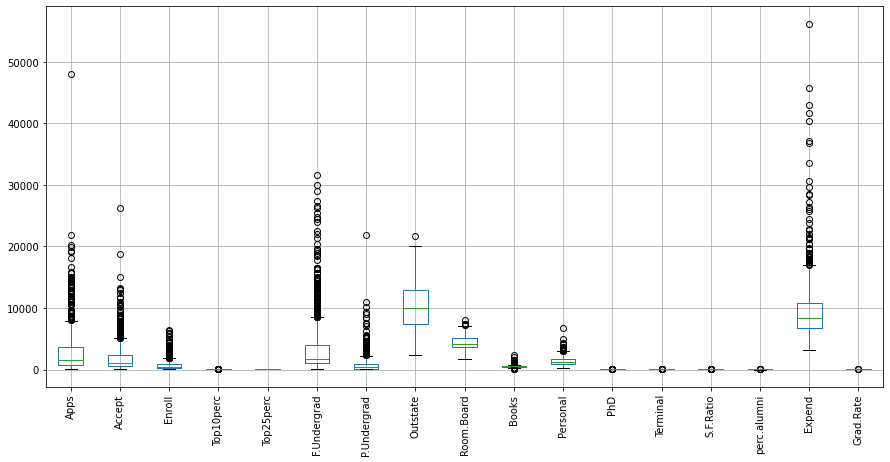

In [20]:
df.boxplot(figsize=(15,7))
plt.xticks(rotation=90)
plt.show()

In [21]:
def box_plot(column,nbins):
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

BoxPlot of Apps
----------------------------------------------------------------------------


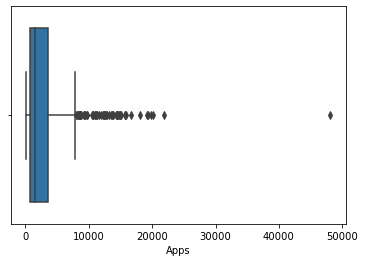

BoxPlot of Accept
----------------------------------------------------------------------------


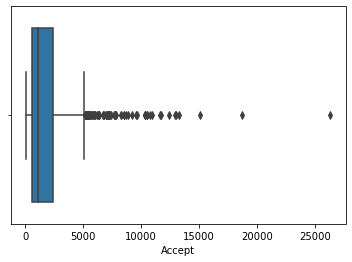

BoxPlot of Enroll
----------------------------------------------------------------------------


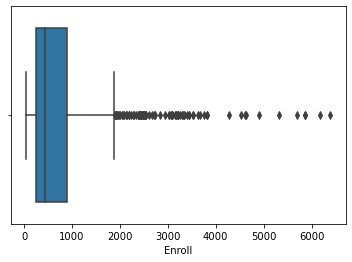

BoxPlot of Top10perc
----------------------------------------------------------------------------


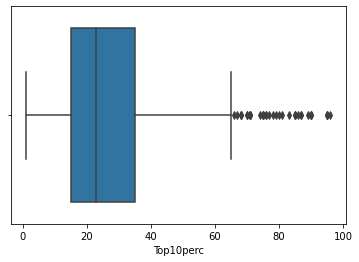

BoxPlot of Top25perc
----------------------------------------------------------------------------


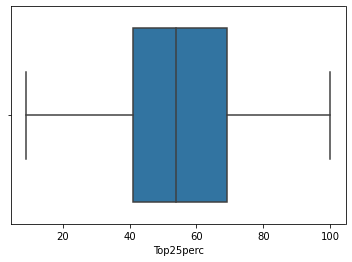

BoxPlot of F.Undergrad
----------------------------------------------------------------------------


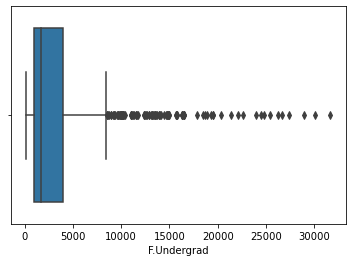

BoxPlot of P.Undergrad
----------------------------------------------------------------------------


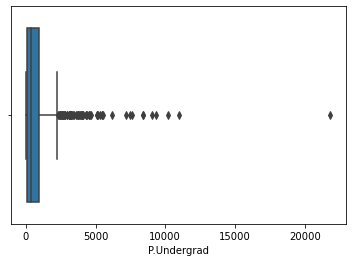

BoxPlot of Outstate
----------------------------------------------------------------------------


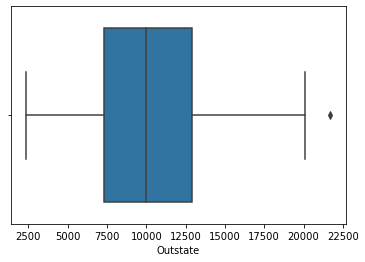

BoxPlot of Room.Board
----------------------------------------------------------------------------


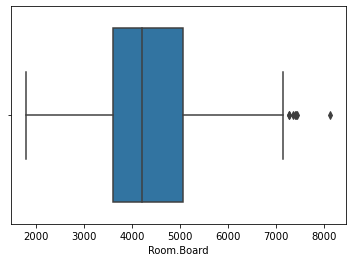

BoxPlot of Books
----------------------------------------------------------------------------


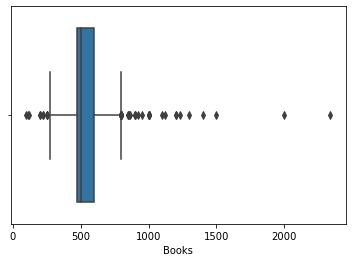

BoxPlot of Personal
----------------------------------------------------------------------------


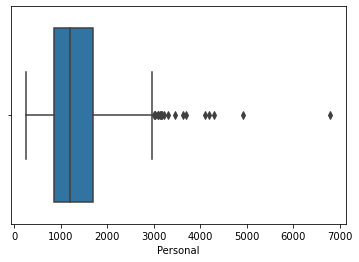

BoxPlot of PhD
----------------------------------------------------------------------------


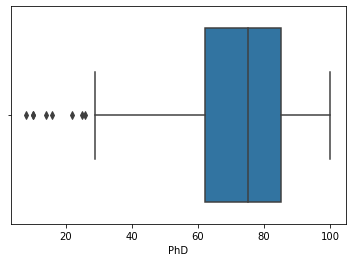

BoxPlot of Terminal
----------------------------------------------------------------------------


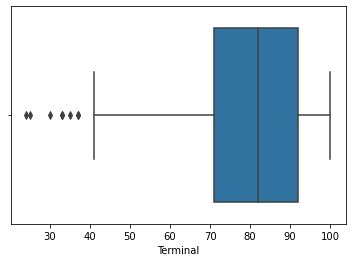

BoxPlot of S.F.Ratio
----------------------------------------------------------------------------


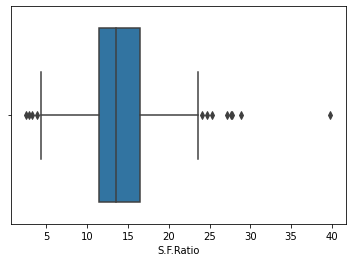

BoxPlot of perc.alumni
----------------------------------------------------------------------------


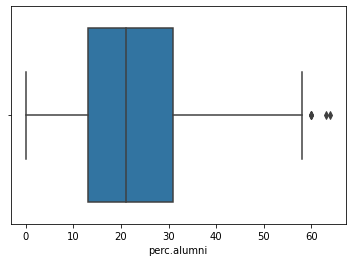

BoxPlot of Expend
----------------------------------------------------------------------------


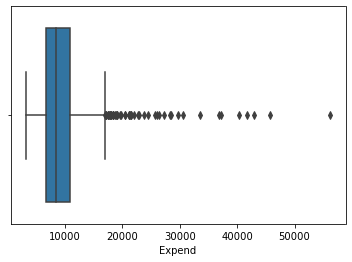

BoxPlot of Grad.Rate
----------------------------------------------------------------------------


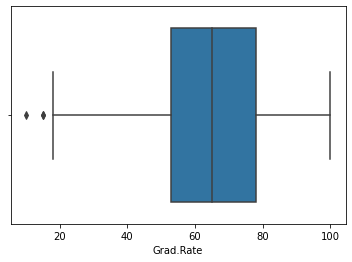

In [22]:
for x in lstnumericcolumns:
    box_plot(x,20)

**Outliers observed after Scaling :**

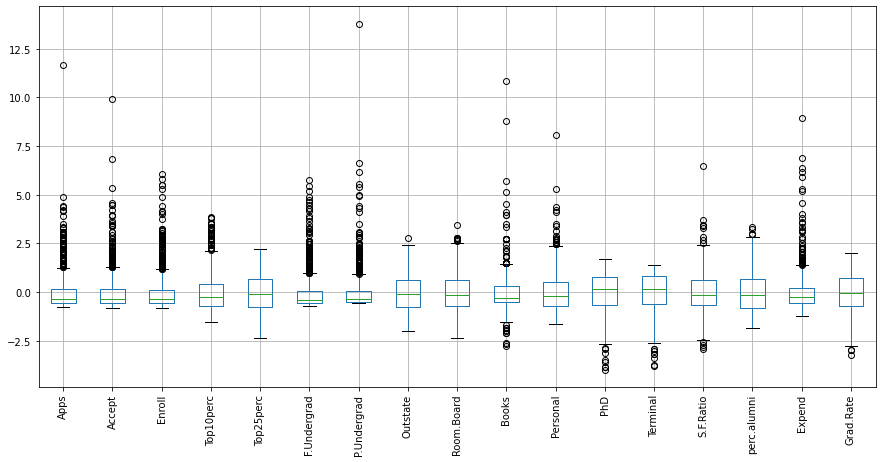

In [26]:
df_num_scaled.boxplot(figsize=(15,7))
plt.xticks(rotation=90)
plt.show()

In [27]:
def box_plot_scaled(column,nbins):
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df_num_scaled[column])
    plt.show()

In [28]:
df_num_new = df_num_scaled.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns_scaled = list(df_num_scaled.columns.values)
len(lstnumericcolumns_scaled)

17

BoxPlot of Apps
----------------------------------------------------------------------------


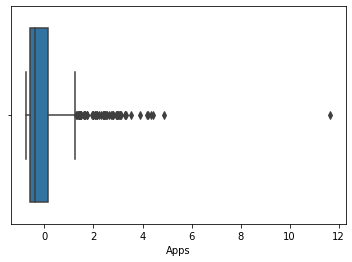

BoxPlot of Accept
----------------------------------------------------------------------------


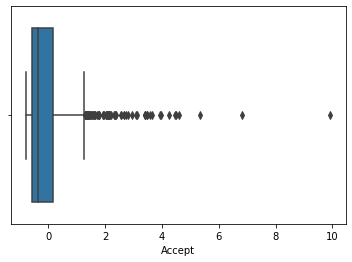

BoxPlot of Enroll
----------------------------------------------------------------------------


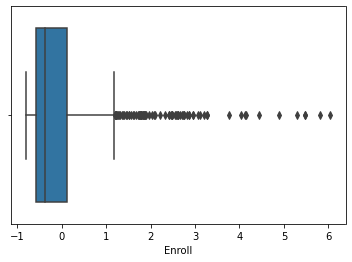

BoxPlot of Top10perc
----------------------------------------------------------------------------


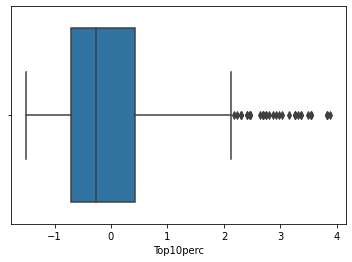

BoxPlot of Top25perc
----------------------------------------------------------------------------


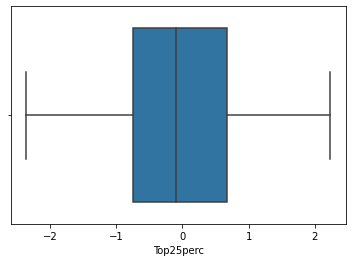

BoxPlot of F.Undergrad
----------------------------------------------------------------------------


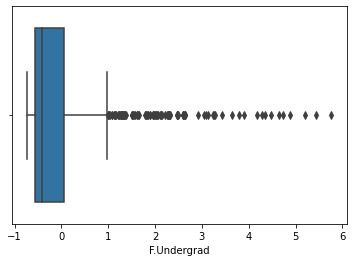

BoxPlot of P.Undergrad
----------------------------------------------------------------------------


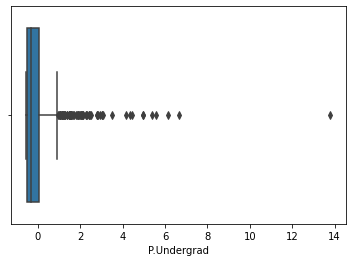

BoxPlot of Outstate
----------------------------------------------------------------------------


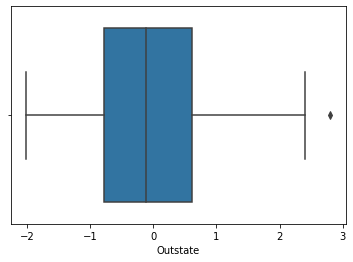

BoxPlot of Room.Board
----------------------------------------------------------------------------


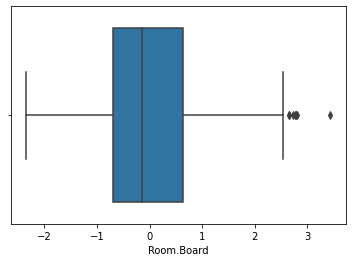

BoxPlot of Books
----------------------------------------------------------------------------


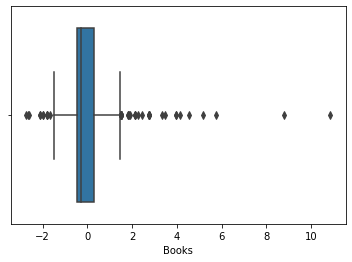

BoxPlot of Personal
----------------------------------------------------------------------------


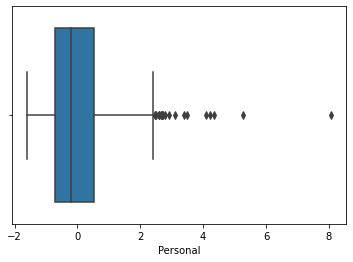

BoxPlot of PhD
----------------------------------------------------------------------------


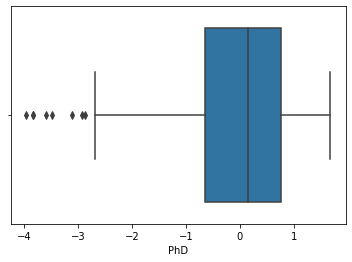

BoxPlot of Terminal
----------------------------------------------------------------------------


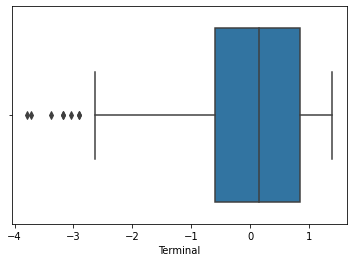

BoxPlot of S.F.Ratio
----------------------------------------------------------------------------


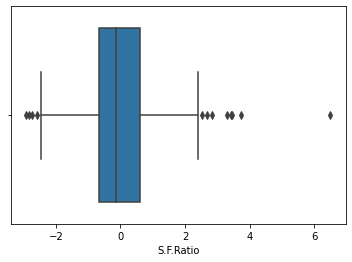

BoxPlot of perc.alumni
----------------------------------------------------------------------------


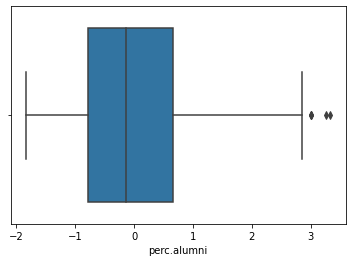

BoxPlot of Expend
----------------------------------------------------------------------------


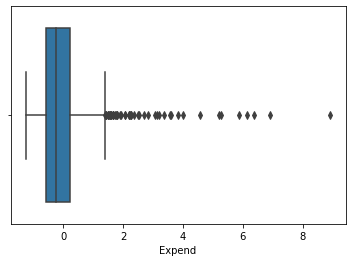

BoxPlot of Grad.Rate
----------------------------------------------------------------------------


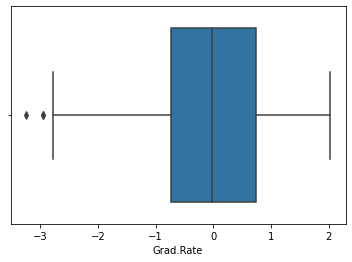

In [29]:
for x in lstnumericcolumns_scaled:
    box_plot_scaled(x,20)

**Insights Derived:**

**We have not treated the outliers before scaling. Hence, the there are no changes in the outliers for all the variables.**

**The only difference is that the outliers are placed in the boxplot post scaling as per their scaled values.**

**Hence, there are no difference in the outliers for variables post scaling of the data.**


## 2.5 Perform PCA and export the data of the Principal Component scores into a data frame.

In [30]:
df_num_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    float64
 1   Accept       777 non-null    float64
 2   Enroll       777 non-null    float64
 3   Top10perc    777 non-null    float64
 4   Top25perc    777 non-null    float64
 5   F.Undergrad  777 non-null    float64
 6   P.Undergrad  777 non-null    float64
 7   Outstate     777 non-null    float64
 8   Room.Board   777 non-null    float64
 9   Books        777 non-null    float64
 10  Personal     777 non-null    float64
 11  PhD          777 non-null    float64
 12  Terminal     777 non-null    float64
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    float64
 15  Expend       777 non-null    float64
 16  Grad.Rate    777 non-null    float64
dtypes: float64(17)
memory usage: 103.3 KB


In [31]:
chi_square_value,p_value=calculate_bartlett_sphericity(df_num_scaled)
p_value

0.0

**P-value is low, then we can reject the null hypothesis (All variables in the data are uncorrelated) and agree that there is atleast one pair of variables in the data which are correlated hence PCA is recommended.**

In [32]:
kmo_all,kmo_model=calculate_kmo(df_num_scaled)
kmo_model

0.8131776428730134

**MSA is > 0.7. Hence, we can expect PCA to provide a considerable reduction is the dimension and extraction of meaningful components.**

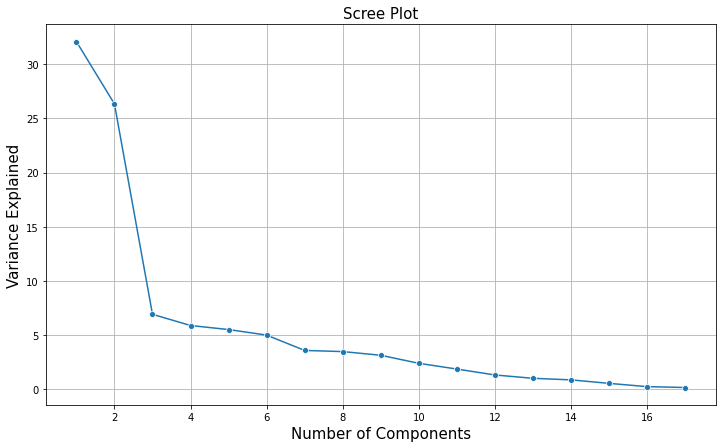

In [38]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [36]:
var_exp

[32.09887440472291,
 26.343586756264354,
 6.900134493207622,
 5.862662971496299,
 5.4909169657868455,
 4.977964976700813,
 3.5593195939891027,
 3.453403325686478,
 3.114468206318075,
 2.370749131119881,
 1.8397086375846166,
 1.2942408033333521,
 0.9856423126916478,
 0.8400855603042318,
 0.5173721499515699,
 0.2156928048436411,
 0.13517690599856447]

In [69]:
pca = PCA(n_components=4, random_state=123)
df_pca = pca.fit_transform(df_num_scaled)
df_pca.transpose()

array([[-1.59178367e+00, -2.19726733e+00, -1.43106151e+00, ...,
        -7.35654960e-01,  7.92729369e+00, -4.57851960e-01],
       [ 7.62095218e-01, -5.82570558e-01, -1.09617695e+00, ...,
        -7.85324270e-02, -2.04892384e+00,  3.62098298e-01],
       [-1.16124379e-01,  2.31716934e+00, -4.34091526e-01, ...,
         1.61309990e-03,  2.08177647e+00, -1.33525852e+00],
       [-9.49498371e-01,  3.59194965e+00,  7.02472185e-01, ...,
         7.26738246e-02,  8.43365807e-01, -1.78414311e-01]])

In [70]:
pca.components_

array([[ 0.24753254,  0.20629976,  0.17513884,  0.35399056,  0.34370247,
         0.15352759,  0.02578593,  0.29496599,  0.24889688,  0.06428278,
        -0.04259817,  0.31957923,  0.31677648, -0.17716449,  0.20541801,
         0.31860554,  0.25562687],
       [ 0.33242688,  0.37287506,  0.40425064, -0.08150778, -0.04391409,
         0.4180893 ,  0.31511913, -0.24874817, -0.13692792,  0.05660665,
         0.21963415,  0.05885405,  0.04700083,  0.24607666, -0.24602358,
        -0.13072737, -0.16868629],
       [-0.05967705, -0.09775989, -0.08135756,  0.03428216, -0.02551092,
        -0.06056293,  0.13796695,  0.04814918,  0.1521435 ,  0.67969354,
         0.49530009, -0.13190398, -0.07097053, -0.29124016, -0.14709007,
         0.22791795, -0.20524112],
       [ 0.28509536,  0.27178882,  0.16345715, -0.05518457, -0.11585077,
         0.1012921 , -0.15895145,  0.13657187,  0.19157617,  0.0713797 ,
        -0.24903276, -0.52919381, -0.51814668, -0.16846807,  0.01611471,
         0.08606828

In [71]:
pca.explained_variance_ratio_

array([0.32098874, 0.26343587, 0.06900134, 0.05862663])

In [72]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(df_num_scaled))
df_pca_loading.shape

(4, 17)

In [73]:
df_pca_loading.head(4)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.247533,0.206300,0.175139,0.353991,0.343702,0.153528,0.025786,0.294966,0.248897,0.064283,-0.042598,0.319579,0.316776,-0.177164,0.205418,0.318606,0.255627
1,0.332427,0.372875,0.404251,-0.081508,-0.043914,0.418089,0.315119,-0.248748,-0.136928,0.056607,0.219634,0.058854,0.047001,0.246077,-0.246024,-0.130727,-0.168686
2,-0.059677,-0.097760,-0.081358,0.034282,-0.025511,-0.060563,0.137967,0.048149,0.152144,0.679694,0.495300,-0.131904,-0.070971,-0.291240,-0.147090,0.227918,-0.205241
3,0.285095,0.271789,0.163457,-0.055185,-0.115851,0.101292,-0.158951,0.136572,0.191576,0.071380,-0.249033,-0.529194,-0.518147,-0.168468,0.016115,0.086068,0.243114


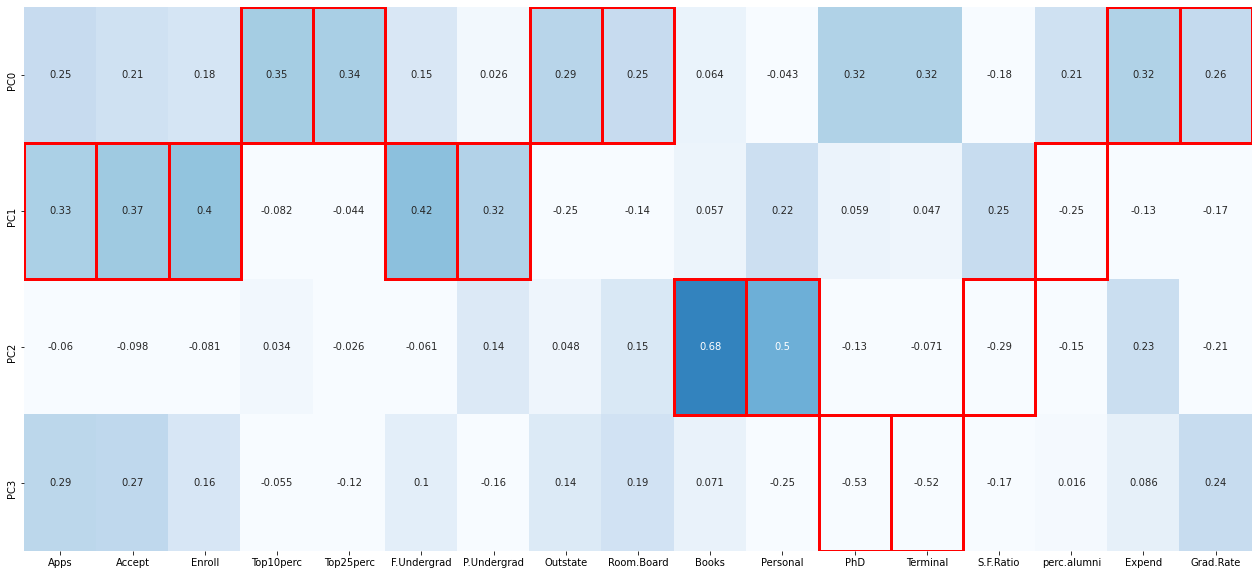

In [74]:
fig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC0','PC1','PC2','PC3'])

column_max = df_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

In [76]:
df_pca = pd.DataFrame(df_pca,columns=['pc_University_Overview','pc_Admissions','pc_Fees&Expenses','pc_Faculty&Staff'])
df_pca.head()

,pc_University_Overview,pc_Admissions,pc_Fees&Expenses,pc_Faculty&Staff
0,-1.591784,0.762095,-0.116124,-0.949498
1,-2.197267,-0.582571,2.317169,3.591950
2,-1.431062,-1.096177,-0.434092,0.702472
3,2.860558,-2.623302,0.128980,-1.248898
4,-2.221481,0.018421,2.378943,-1.069758


In [77]:
df_pca.shape

(777, 4)

In [78]:
df_cat = df.select_dtypes(include = ['object'])

In [79]:
df_new = pd.concat([df_cat, df_pca], axis=1)

In [80]:
df_new.shape

(777, 5)

In [81]:
df_new.head()

,Names,pc_University_Overview,pc_Admissions,pc_Fees&Expenses,pc_Faculty&Staff
0,Abilene Christian University,-1.591784,0.762095,-0.116124,-0.949498
1,Adelphi University,-2.197267,-0.582571,2.317169,3.591950
2,Adrian College,-1.431062,-1.096177,-0.434092,0.702472
3,Agnes Scott College,2.860558,-2.623302,0.128980,-1.248898
4,Alaska Pacific University,-2.221481,0.018421,2.378943,-1.069758


In [82]:
df_new.describe(include='all')

,Names,pc_University_Overview,pc_Admissions,pc_Fees&Expenses,pc_Faculty&Staff
count,777,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02
unique,777,NaN,NaN,NaN,NaN
top,St. Lawrence University,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,2.050412e-17,-9.959143e-17,5.429662e-18,1.117367e-16
std,NaN,2.337486e+00,2.117588e+00,1.083759e+00,9.989680e-01
min,NaN,-5.671814e+00,-3.578529e+00,-2.935482e+00,-2.978110e+00
25%,NaN,-1.750032e+00,-1.350500e+00,-6.630521e-01,-6.538644e-01
50%,NaN,-2.982340e-01,-6.271045e-01,-9.798591e-02,-5.263555e-02
75%,NaN,1.345788e+00,6.885518e-01,4.948139e-01,5.627185e-01


## 2.6 Extract the eigenvalues, and eigenvectors.

In [33]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('\n')
print('Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
 %s [5.46384062 4.4841809  1.17453449 0.99793705 0.93465879 0.84734458
 0.60586408 0.58783511 0.53014189 0.40354672 0.02300969 0.03671503
 0.3131535  0.08806661 0.14299858 0.16777512 0.22030447]


Eigen Vectors 
 %s [[-2.47532537e-01  3.32426877e-01 -5.96777039e-02  2.85096690e-01
  -1.70019622e-04  1.22811932e-02  3.06596836e-02  1.03577277e-01
   8.93297613e-02 -5.07359465e-02  3.59723152e-01 -4.59049537e-01
   4.31741045e-02 -1.32822763e-01 -6.60495278e-02 -5.97045093e-01
  -2.33859080e-02]
 [-2.06299756e-01  3.72875058e-01 -9.77593828e-02  2.71787742e-01
  -5.06165527e-02 -1.12771266e-02  2.81197218e-03  5.55282328e-02
   1.76710689e-01 -4.05496164e-02 -5.44054193e-01  5.17547918e-01
  -5.86528967e-02  1.44994783e-01 -2.62518280e-02 -2.92920428e-01
   1.46702734e-01]
 [-1.75138842e-01  4.04250640e-01 -8.13575684e-02  1.63457087e-01
   5.87975580e-02  4.01196268e-02  2.35400786e-02 -5.83157504e-02
   1.28035155e-01 -3.14617978e-02  6.09048127e-01  4.05328352e-01
  -6

## 2.7 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only).

In [88]:
np.round(pca.components_[0],2)

array([ 0.25,  0.21,  0.18,  0.35,  0.34,  0.15,  0.03,  0.29,  0.25,
        0.06, -0.04,  0.32,  0.32, -0.18,  0.21,  0.32,  0.26])

In [91]:
print('The explicit form of 1st principal component:')
for i in range(0,df_num_scaled.shape[1]):
    print('{} * {}'.format(np.round(pca.components_[0][i],2),df_num_scaled.columns[i]),end=' + ')

The explicit form of 1st principal component:
0.25 * Apps + 0.21 * Accept + 0.18 * Enroll + 0.35 * Top10perc + 0.34 * Top25perc + 0.15 * F.Undergrad + 0.03 * P.Undergrad + 0.29 * Outstate + 0.25 * Room.Board + 0.06 * Books + -0.04 * Personal + 0.32 * PhD + 0.32 * Terminal + -0.18 * S.F.Ratio + 0.21 * perc.alumni + 0.32 * Expend + 0.26 * Grad.Rate + 

## 2.8 Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [34]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 32.0988744   58.44246116  65.34259565  71.20525863  76.69617559
  81.67414057  85.23346016  88.68686349  91.80133169  94.17208083
  96.01178946  97.30603027  98.29167258  99.13175814  99.64913029
  99.86482309 100.        ]


**Cumulative values determines how much proportion of total variance is explained by each of the principal component. Moreover, cumulative values create principal components in decreasing order of magnitude of their variances where 1st principal component explains highest proportion of variance. This very feature of cumulative values helps determine how many principal components should be considered for further analysis and how many should be discarded leading to 'dimension reduction' which is an essential objective of PCA. As a rule of thumb, we choose to keep the number of principal components which explain 70% to 90% of the total variance and discard the rest.**

**Eigenvectors are the principal components themselves. They provide linear combination of the variable which carries most of the variance in the data. Each eigenvector represents a direction where there is more variance and each eigenvector is orthogonal to the other.**

## 2.9 Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

**We have decided to keep about 4 PC's in total which cumulatively explain 71.2% of total variance observed in the data. The basis of these four PC's is to provide an overview of the important factors essential to further analyse and differentiate about 777 universities in USA across parameters such as their overall student capacity and student demograpics, university popularity/preference, student facilities/services/lifestyle and additional charges levied for the same, general student expenses and living costs and faculty and staff experience and achievements.** 

**One business implication using the 4 PC's can help in ranking/rating these universities based on the above parameters**

**For Universities, these will help them focus on the core operations within these parameters to improve the overall efficacy and reach to the potential students and more over to promote their university based on their strengths. The rankings/ratings will bring to light the areas which need improvement and can also be used to create effective surveys to attract potential students and maybe also to open more campuses and expand**

**The PC's can be used by the governments and private HNI's to provide fundings/grants and donations to these universities**

**For employers, these parameters could help them set preferences for the employees they can look to hire and decide on the salaries and positions offered, basically to set their hiring preferences from these universities.**  

**For Students, these will help them choose the universities according to their interests, affordability etc**